
=== DEMO DI ANALISI AUDIO CON LIBROSA ===

Analisi del file audio: DEAM_audio/MEMD_audio\10.mp3
File audio caricato: 45.06 secondi, 44100 Hz

Caratteristiche estratte:
- Tempo: [93.96306818] BPM
- Centroide spettrale medio: 1785.33
- Larghezza di banda spettrale media: 2297.40
- RMS medio (intensità): 0.0663


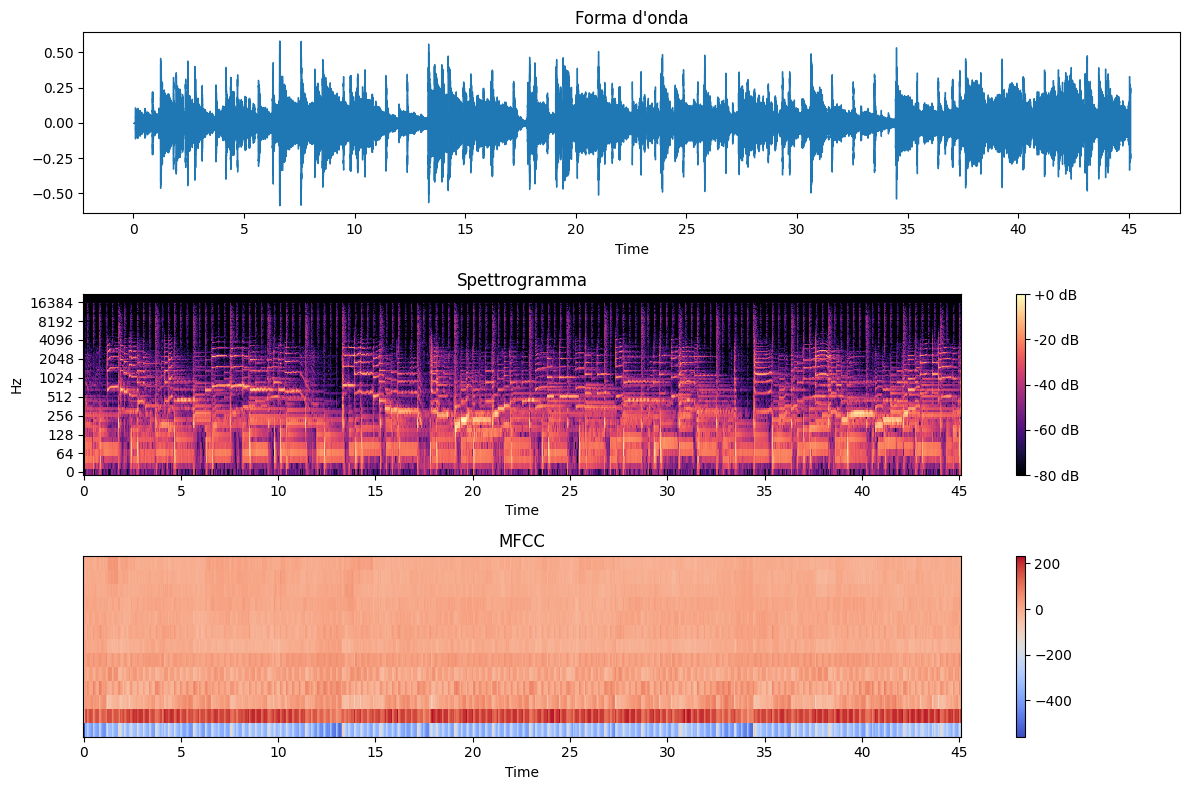


Analisi completata!


In [1]:
# Importiamo i moduli necessari per il nostro programma
import os  # Per gestire i percorsi dei file e le operazioni sul filesystem
import librosa  # Per l'analisi audio e l'estrazione delle caratteristiche
import numpy as np  # Per i calcoli matematici e la gestione degli array
import pandas as pd  # Per la gestione dei dati in formato tabellare
import matplotlib.pyplot as plt  # Per creare grafici e visualizzazioni
from sklearn.preprocessing import StandardScaler  # Per normalizzare i dati

# Questa funzione analizza un file audio ed estrae le caratteristiche emotive
def extract_emotion_features(audio_path, show_plots=True):
    # Mostriamo quale file stiamo analizzando
    print(f"Analisi del file audio: {audio_path}")
    
    # Carichiamo il file audio in memoria
    # y contiene i dati audio, sr è la frequenza di campionamento (quanti campioni al secondo)
    y, sr = librosa.load(audio_path, sr=None)
    # Mostriamo la durata del file e la sua frequenza di campionamento
    print(f"File audio caricato: {len(y)/sr:.2f} secondi, {sr} Hz")
    
    # Estraiamo i coefficienti MFCC che descrivono il timbro del suono
    # (come suona la voce o lo strumento)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    # Calcoliamo la media dei coefficienti MFCC
    mfcc_means = np.mean(mfccs, axis=1)
    
    # Calcoliamo caratteristiche spettrali che descrivono la distribuzione delle frequenze
    # Il centroide spettrale indica dove si concentra l'energia del suono
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
    # La larghezza di banda spettrale indica quanto sono sparse le frequenze
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)[0]
    
    # Estraiamo informazioni sul ritmo della musica
    # tempo indica i battiti al minuto (BPM)
    tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
    
    # Calcoliamo l'intensità del suono (volume) nel tempo
    rms = librosa.feature.rms(y=y)[0]
    
    # Mostriamo i risultati dell'analisi
    print("\nCaratteristiche estratte:")
    print(f"- Tempo: {tempo} BPM")  # Velocità della musica
    print(f"- Centroide spettrale medio: {np.mean(spectral_centroid):.2f}")  # Brillantezza del suono
    print(f"- Larghezza di banda spettrale media: {np.mean(spectral_bandwidth):.2f}")  # Varietà delle frequenze
    print(f"- RMS medio (intensità): {np.mean(rms):.4f}")  # Volume medio
    
    # Creiamo dei grafici per visualizzare l'audio
    if show_plots:
        # Creiamo una figura con tre grafici
        plt.figure(figsize=(12, 8))
        
        # Primo grafico: la forma d'onda (come varia il suono nel tempo)
        plt.subplot(3, 1, 1)
        librosa.display.waveshow(y, sr=sr)
        plt.title('Forma d\'onda')
        
        # Secondo grafico: lo spettrogramma (come variano le frequenze nel tempo)
        plt.subplot(3, 1, 2)
        D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
        librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
        plt.colorbar(format='%+2.0f dB')
        plt.title('Spettrogramma')
        
        # Terzo grafico: i coefficienti MFCC (caratteristiche del timbro)
        plt.subplot(3, 1, 3)
        librosa.display.specshow(mfccs, sr=sr, x_axis='time')
        plt.colorbar()
        plt.title('MFCC')
        
        # Sistemiamo il layout e mostriamo i grafici
        plt.tight_layout()
        plt.show()
    
    # Restituiamo un dizionario con le caratteristiche estratte
    return {
        'tempo': tempo[0],  # Velocità della musica (battiti al minuto)
        'spectral_centroid_mean': np.mean(spectral_centroid),  # Brillantezza media del suono
        'spectral_bandwidth_mean': np.mean(spectral_bandwidth),  # Varietà media delle frequenze
        'rms_mean': np.mean(rms)  # Volume medio
    }

# Funzione principale che gestisce l'esecuzione del programma
def main():
    # Mostriamo il titolo del programma
    print("\n=== DEMO DI ANALISI AUDIO CON LIBROSA ===\n")
    
    # Definiamo il percorso della cartella che contiene i file audio
    audio_dir = 'DEAM_audio/MEMD_audio'
    
    # Scegliamo quale brano analizzare (puoi cambiare questo numero)
    example_song_id = 10
    # Costruiamo il percorso completo del file audio
    audio_path = os.path.join(audio_dir, f"{example_song_id}.mp3")
    
    # Verifichiamo che il file esista prima di procedere
    if not os.path.exists(audio_path):
        print(f"Errore: Il file {audio_path} non esiste.")
        return
    
    # Analizziamo il file audio (senza mostrare i grafici)
    features = extract_emotion_features(audio_path, show_plots=True)
    
    # Proviamo a caricare le annotazioni emotive (valutazioni umane delle emozioni)
    annotations_path = 'DEAM_Annotations (2)/annotations/annotations averaged per song/song_level/static_annotations_averaged_songs_1_2000.csv'
    if os.path.exists(annotations_path):
        # Leggiamo il file CSV con le annotazioni
        annotations = pd.read_csv(annotations_path)
        # Puliamo i nomi delle colonne rimuovendo gli spazi
        annotations.columns = annotations.columns.str.strip()
        # Troviamo le annotazioni per il nostro brano
        song_annotation = annotations[annotations['song_id'] == example_song_id]
        
        # Se abbiamo trovato le annotazioni, le mostriamo
        if not song_annotation.empty:
            # Estraiamo i valori di valence (positività) e arousal (energia)
            valence = song_annotation['valence_mean'].values[0]
            arousal = song_annotation['arousal_mean'].values[0]
            # Mostriamo i risultati
            print(f"\nAnnotazioni emotive per il brano {example_song_id}:")
            print(f"- Valence (positività): {valence:.2f}/9")
            print(f"- Arousal (energia): {arousal:.2f}/9")
    
    # Indichiamo che l'analisi è terminata
    print("\nAnalisi completata!")

# Questo codice viene eseguito solo se lo script viene avviato direttamente
if __name__ == "__main__":
    main()